# 날씨 데이터 가공

In [769]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import seaborn as sns

In [770]:
f = open('weather.csv')
data = csv.reader(f)
header = next(data)
header + ['체감온도(°C)', '불쾌지수']
weather = []

for row in data:
    for i in range(1,2):
        row[i] = int(row[i].replace('-',''))
    for i in range(2, 7):
        row[i] = float(row[i])
    weather.append(row)

In [771]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0],
 ['서울', 20200119, 1.9, 0.6, 2.2, 62.8, 0.3],
 ['서울', 20200120, 0.7, 0.0, 2.5, 46.8, 0.0],
 ['서울', 20200121, -0.4, 0.0, 1.4, 36.9, 0.0],
 ['서울', 20200122, 3.0, 0.0, 1.7, 36.0, 0.

# 체감온도 구하기(7) [1-3월, 5-8월 적용]

In [772]:
for i in weather:
    b = int(str(i[1]))
    p_temp = 13.12 + (0.6215 * i[2]) - (11.37 * (i[4] ** 0.16)) + (0.3965 * (i[4] ** 0.16))
    if b <= 20200331:
        i.append(round(p_temp, 2))
    elif 20200501 <= b <= 20200831:
        i.append(round(p_temp, 2))
    else:
        i.append(0)
        #i.append(np.nan)

In [773]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0, 1.64],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0, 2.44],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0, 1.11],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0, 1.71],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0, 2.79],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0, 1.9],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0, 3.34],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0, 1.33],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0, -0.16],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0, 1.04],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0, 0.9],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0, -0.12],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0, -1.22],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0, -0.14],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0, -0.72],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0, 0.23],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0, 1.04],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0, 1.25],
 ['서울', 20200119, 1.9, 0.6, 2.2, 62.8, 0.3, 1.85],
 ['서울', 2020012

# 불쾌지수 구하기(9) [6-8월 적용]

In [774]:
for i in weather:
    b = int(str(i[1]))
    DI = (9 / 5 * i[2]) - 0.55 * ((1 - (i[5] / 100)) * ((9 / 5 * i[2]) - 26)) + 32
    if 20200601 <= b <= 20200831:
        i.append(round(DI, 2))
    else:
        i.append(0)
        #i.append(np.nan)

In [775]:
weather

[['서울', 20200101, -2.2, 0.1, 0.6, 64.4, 0.0, 1.64, 0],
 ['서울', 20200102, 1.0, 0.0, 1.2, 65.4, 0.0, 2.44, 0],
 ['서울', 20200103, -0.1, 0.0, 1.7, 56.9, 0.0, 1.11, 0],
 ['서울', 20200104, 1.2, 0.0, 1.9, 50.8, 0.0, 1.71, 0],
 ['서울', 20200105, 1.3, 0.0, 1.1, 45.6, 0.0, 2.79, 0],
 ['서울', 20200106, 3.1, 1.8, 3.1, 65.4, 0.0, 1.9, 0],
 ['서울', 20200107, 6.3, 46.3, 4.0, 95.0, 0.0, 3.34, 0],
 ['서울', 20200108, 2.4, 11.6, 3.3, 86.1, 0.0, 1.33, 0],
 ['서울', 20200109, -1.2, 0.0, 2.3, 65.3, 0.0, -0.16, 0],
 ['서울', 20200110, -0.6, 0.0, 1.5, 62.9, 0.0, 1.04, 0],
 ['서울', 20200111, -0.1, 0.0, 1.9, 60.9, 0.0, 0.9, 0],
 ['서울', 20200112, -1.0, 0.0, 2.4, 61.5, 0.0, -0.12, 0],
 ['서울', 20200113, -2.9, 0.0, 2.3, 51.0, 0.0, -1.22, 0],
 ['서울', 20200114, -2.3, 0.0, 1.6, 45.3, 0.0, -0.14, 0],
 ['서울', 20200115, -2.7, 0.0, 1.9, 44.8, 0.0, -0.72, 0],
 ['서울', 20200116, -1.7, 0.0, 1.6, 43.0, 0.0, 0.23, 0],
 ['서울', 20200117, -0.6, 0.0, 1.5, 43.9, 0.0, 1.04, 0],
 ['서울', 20200118, 0.3, 0.0, 1.8, 48.1, 0.0, 1.25, 0],
 ['서울', 2020

# 숫자 데이터 모두 int로 인식시키기, '배달전문업체', '심부름', '야식' 데이터 제외

In [776]:
import csv

f = open('seoul2020.csv', encoding='UTF8')
data = csv.reader(f)
deliv = []

for row in data:
    for i in range(1) :
        if row[i] == '\ufeff2020-01-01':
            row[i] = int(20200101)
        else:
            row[i] = int(row[i].replace('-',''))
    for i in range(4, 5):
        row[i] = int(row[i])
        
    if row[1] == '배달전문업체' or row[1] == '심부름' or row[1] == '야식':
        continue
    else:
        deliv.append(row)

In [777]:
deliv

[[20200101, '도시락', '서울특별시', '관악구', 1],
 [20200101, '도시락', '서울특별시', '양천구', 2],
 [20200101, '돈까스/일식', '서울특별시', '구로구', 22],
 [20200101, '돈까스/일식', '서울특별시', '금천구', 5],
 [20200101, '돈까스/일식', '서울특별시', '노원구', 14],
 [20200101, '돈까스/일식', '서울특별시', '도봉구', 20],
 [20200101, '돈까스/일식', '서울특별시', '양천구', 17],
 [20200101, '돈까스/일식', '서울특별시', '은평구', 18],
 [20200101, '분식', '서울특별시', '구로구', 316],
 [20200101, '분식', '서울특별시', '금천구', 233],
 [20200101, '분식', '서울특별시', '노원구', 69],
 [20200101, '분식', '서울특별시', '도봉구', 89],
 [20200101, '분식', '서울특별시', '영등포구', 51],
 [20200101, '분식', '서울특별시', '은평구', 90],
 [20200101, '아시안/양식', '서울특별시', '구로구', 8],
 [20200101, '아시안/양식', '서울특별시', '금천구', 64],
 [20200101, '아시안/양식', '서울특별시', '도봉구', 9],
 [20200101, '아시안/양식', '서울특별시', '동작구', 1],
 [20200101, '아시안/양식', '서울특별시', '영등포구', 90],
 [20200101, '아시안/양식', '서울특별시', '은평구', 16],
 [20200101, '족발/보쌈', '서울특별시', '구로구', 151],
 [20200101, '족발/보쌈', '서울특별시', '금천구', 112],
 [20200101, '족발/보쌈', '서울특별시', '도봉구', 43],
 [20200101, '족발/보쌈', '서울특별시', '동작구', 18],
 [

# 일 별 업종별 배달 총 건수

In [778]:
deliv_case = []
f_date = 20200101

lunchbox = 0
j_food = 0
bunsik = 0
asian = 0
jokbal = 0
c_food = 0
steamed = 0
chicken = 0
dissert = 0
junk_food = 0
pizza = 0
k_food = 0
sushi = 0
total = 0

for i in deliv:
    if f_date == i[0]:
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
    else:
        deliv_case.append(
            [f_date, lunchbox, j_food, bunsik, asian, jokbal, 
             c_food, steamed, chicken, dissert, junk_food, 
             pizza, k_food, sushi, total])
        lunchbox = 0
        j_food = 0
        bunsik = 0
        asian = 0
        jokbal = 0
        c_food = 0
        steamed = 0
        chicken = 0
        dissert = 0
        junk_food = 0
        pizza = 0
        k_food = 0
        sushi = 0
        total = 0
        
        f_date = i[0]
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
        
deliv_case

[[20200101,
  3,
  96,
  848,
  188,
  455,
  137,
  76,
  1822,
  637,
  507,
  545,
  533,
  177,
  6024],
 [20200102,
  31,
  137,
  706,
  118,
  261,
  74,
  42,
  1069,
  304,
  377,
  288,
  295,
  68,
  3770],
 [20200103,
  32,
  91,
  715,
  140,
  351,
  92,
  39,
  1496,
  380,
  465,
  303,
  403,
  115,
  4622],
 [20200104,
  13,
  100,
  888,
  206,
  439,
  130,
  57,
  1593,
  497,
  565,
  420,
  536,
  180,
  5624],
 [20200105,
  2,
  135,
  910,
  240,
  431,
  164,
  72,
  1510,
  529,
  589,
  464,
  512,
  133,
  5691],
 [20200106,
  56,
  214,
  1428,
  300,
  430,
  168,
  74,
  2136,
  556,
  836,
  468,
  792,
  198,
  7656],
 [20200107,
  25,
  114,
  795,
  140,
  338,
  63,
  52,
  1471,
  331,
  492,
  319,
  462,
  110,
  4712],
 [20200108,
  24,
  128,
  710,
  136,
  287,
  63,
  47,
  1167,
  248,
  391,
  251,
  348,
  68,
  3868],
 [20200109, 34, 96, 681, 140, 307, 75, 59, 1364, 303, 421, 262, 374, 86, 4202],
 [20200110,
  22,
  104,
  749,
  134,
  

도시락: 1, 돈까스/일식: 2, 분식: 3, 아시안/양식: 4, 족발/보쌈: 5, 중식: 6, 찜탕: 7, 치킨: 8, 카페/디저트: 9, 패스트푸드: 10, 피자: 11, 한식: 12, 회: 13

일별 총 배달 건수

In [779]:
deliv_case1 = []
f_date = 20200101
d = 0

for i in deliv:
    if f_date == i[0]:
        d += i[4]
    else:
        deliv_case1.append([d])
        d = 0
        f_date = i[0]
        d += i[4]

### 요일별

In [780]:
deliv_case2 = deliv_case

In [781]:
u = 0

for i in deliv_case2:
    if u % 7 == 0:
        i.append('수')
        u += 1
    elif u % 7 == 1:
        i.append('목')
        u += 1
    elif u % 7 == 2:
        i.append('금')
        u += 1
    elif u % 7 == 3:
        i.append('토')
        u += 1
    elif u % 7 == 4:
        i.append('일')
        u += 1
    elif u % 7 == 5:
        i.append('월')
        u += 1
    elif u % 7 == 6:
        i.append('화')
        u += 1
    

In [782]:
deliv_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[14]
    elif i[15] == '화':
        tue += i[14]
    elif i[15] == '수':
        wed += i[14]
    elif i[15] == '목':
        thu += i[14]
    elif i[15] == '금':
        fri += i[14]
    elif i[15] == '토':
        sat += i[14]
    else:
        sun += i [14]
        
deliv_total.append(mon)
deliv_total.append(tue)
deliv_total.append(wed)
deliv_total.append(thu)
deliv_total.append(fri)
deliv_total.append(sat)
deliv_total.append(sun)

In [783]:
deliv_case = []
f_date = 20200101

lunchbox = 0
j_food = 0
bunsik = 0
asian = 0
jokbal = 0
c_food = 0
steamed = 0
chicken = 0
dissert = 0
junk_food = 0
pizza = 0
k_food = 0
sushi = 0
total = 0

for i in deliv:
    if f_date == i[0]:
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]
    else:
        deliv_case.append(
            [f_date, lunchbox, j_food, bunsik, asian, jokbal, 
             c_food, steamed, chicken, dissert, junk_food, 
             pizza, k_food, sushi, total])
        lunchbox = 0
        j_food = 0
        bunsik = 0
        asian = 0
        jokbal = 0
        c_food = 0
        steamed = 0
        chicken = 0
        dissert = 0
        junk_food = 0
        pizza = 0
        k_food = 0
        sushi = 0
        total = 0
        
        f_date = i[0]
        if i[1] == '도시락':
            lunchbox += i[4]
        elif i[1] == '돈까스/일식':
            j_food += i[4]
        elif i[1] == '분식':
            bunsik += i[4]
        elif i[1] == '아시안/양식':
            asian += i[4]
        elif i[1] == '족발/보쌈':
            jokbal += i[4]
        elif i[1] == '중식':
            c_food += i[4]
        elif i[1] == '찜탕':
            steamed += i[4]
        elif i[1] == '치킨':
            chicken += i[4]
        elif i[1] == '카페/디저트':
            dissert += i[4]
        elif i[1] == '패스트푸드':
            junk_food += i[4]
        elif i[1] == '피자':
            pizza += i[4]
        elif i[1] == '한식':
            k_food += i[4]
        elif i[1] == '회':
            sushi += i[4]
        total += i[4]

In [784]:
lunchbox_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[2]
    elif i[15] == '화':
        tue += i[2]
    elif i[15] == '수':
        wed += i[2]
    elif i[15] == '목':
        thu += i[2]
    elif i[15] == '금':
        fri += i[2]
    elif i[15] == '토':
        sat += i[2]
    else:
        sun += i [2]
        
lunchbox_total.append(mon)
lunchbox_total.append(tue)
lunchbox_total.append(wed)
lunchbox_total.append(thu)
lunchbox_total.append(fri)
lunchbox_total.append(sat)
lunchbox_total.append(sun)

In [785]:
j_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[3]
    elif i[15] == '화':
        tue += i[3]
    elif i[15] == '수':
        wed += i[3]
    elif i[15] == '목':
        thu += i[3]
    elif i[15] == '금':
        fri += i[3]
    elif i[15] == '토':
        sat += i[3]
    else:
        sun += i [3]
        
j_food_total.append(mon)
j_food_total.append(tue)
j_food_total.append(wed)
j_food_total.append(thu)
j_food_total.append(fri)
j_food_total.append(sat)
j_food_total.append(sun)

In [786]:
bunsik_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[4]
    elif i[15] == '화':
        tue += i[4]
    elif i[15] == '수':
        wed += i[4]
    elif i[15] == '목':
        thu += i[4]
    elif i[15] == '금':
        fri += i[4]
    elif i[15] == '토':
        sat += i[4]
    else:
        sun += i [4]
        
bunsik_total.append(mon)
bunsik_total.append(tue)
bunsik_total.append(wed)
bunsik_total.append(thu)
bunsik_total.append(fri)
bunsik_total.append(sat)
bunsik_total.append(sun)

In [787]:
asian_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[5]
    elif i[15] == '화':
        tue += i[5]
    elif i[15] == '수':
        wed += i[5]
    elif i[15] == '목':
        thu += i[5]
    elif i[15] == '금':
        fri += i[5]
    elif i[15] == '토':
        sat += i[5]
    else:
        sun += i [5]
        
asian_total.append(mon)
asian_total.append(tue)
asian_total.append(wed)
asian_total.append(thu)
asian_total.append(fri)
asian_total.append(sat)
asian_total.append(sun)

In [788]:
jokbal_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[5]
    elif i[15] == '화':
        tue += i[5]
    elif i[15] == '수':
        wed += i[5]
    elif i[15] == '목':
        thu += i[5]
    elif i[15] == '금':
        fri += i[5]
    elif i[15] == '토':
        sat += i[5]
    else:
        sun += i [5]
        
jokbal_total.append(mon)
jokbal_total.append(tue)
jokbal_total.append(wed)
jokbal_total.append(thu)
jokbal_total.append(fri)
jokbal_total.append(sat)
jokbal_total.append(sun)

In [789]:
c_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[6]
    elif i[15] == '화':
        tue += i[6]
    elif i[15] == '수':
        wed += i[6]
    elif i[15] == '목':
        thu += i[6]
    elif i[15] == '금':
        fri += i[6]
    elif i[15] == '토':
        sat += i[6]
    else:
        sun += i [6]
        
c_food_total.append(mon)
c_food_total.append(tue)
c_food_total.append(wed)
c_food_total.append(thu)
c_food_total.append(fri)
c_food_total.append(sat)
c_food_total.append(sun)

In [790]:
steamed_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[7]
    elif i[15] == '화':
        tue += i[7]
    elif i[15] == '수':
        wed += i[7]
    elif i[15] == '목':
        thu += i[7]
    elif i[15] == '금':
        fri += i[7]
    elif i[15] == '토':
        sat += i[7]
    else:
        sun += i [7]
        
steamed_total.append(mon)
steamed_total.append(tue)
steamed_total.append(wed)
steamed_total.append(thu)
steamed_total.append(fri)
steamed_total.append(sat)
steamed_total.append(sun)

In [791]:
chicken_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[8]
    elif i[15] == '화':
        tue += i[8]
    elif i[15] == '수':
        wed += i[8]
    elif i[15] == '목':
        thu += i[8]
    elif i[15] == '금':
        fri += i[8]
    elif i[15] == '토':
        sat += i[8]
    else:
        sun += i [8]
        
chicken_total.append(mon)
chicken_total.append(tue)
chicken_total.append(wed)
chicken_total.append(thu)
chicken_total.append(fri)
chicken_total.append(sat)
chicken_total.append(sun)

In [792]:
dissert_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[9]
    elif i[15] == '화':
        tue += i[9]
    elif i[15] == '수':
        wed += i[9]
    elif i[15] == '목':
        thu += i[9]
    elif i[15] == '금':
        fri += i[9]
    elif i[15] == '토':
        sat += i[9]
    else:
        sun += i [9]
        
dissert_total.append(mon)
dissert_total.append(tue)
dissert_total.append(wed)
dissert_total.append(thu)
dissert_total.append(fri)
dissert_total.append(sat)
dissert_total.append(sun)

In [793]:
junk_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[10]
    elif i[15] == '화':
        tue += i[10]
    elif i[15] == '수':
        wed += i[10]
    elif i[15] == '목':
        thu += i[10]
    elif i[15] == '금':
        fri += i[10]
    elif i[15] == '토':
        sat += i[10]
    else:
        sun += i [10]
        
junk_food_total.append(mon)
junk_food_total.append(tue)
junk_food_total.append(wed)
junk_food_total.append(thu)
junk_food_total.append(fri)
junk_food_total.append(sat)
junk_food_total.append(sun)

In [794]:
pizza_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[11]
    elif i[15] == '화':
        tue += i[11]
    elif i[15] == '수':
        wed += i[11]
    elif i[15] == '목':
        thu += i[11]
    elif i[15] == '금':
        fri += i[11]
    elif i[15] == '토':
        sat += i[11]
    else:
        sun += i [11]
        
pizza_total.append(mon)
pizza_total.append(tue)
pizza_total.append(wed)
pizza_total.append(thu)
pizza_total.append(fri)
pizza_total.append(sat)
pizza_total.append(sun)

In [795]:
k_food_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[12]
    elif i[15] == '화':
        tue += i[12]
    elif i[15] == '수':
        wed += i[12]
    elif i[15] == '목':
        thu += i[12]
    elif i[15] == '금':
        fri += i[12]
    elif i[15] == '토':
        sat += i[12]
    else:
        sun += i [12]
        
k_food_total.append(mon)
k_food_total.append(tue)
k_food_total.append(wed)
k_food_total.append(thu)
k_food_total.append(fri)
k_food_total.append(sat)
k_food_total.append(sun)

In [796]:
sushi_total = []
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0

for i in deliv_case2:
    if i[15] == '월':
        mon += i[13]
    elif i[15] == '화':
        tue += i[13]
    elif i[15] == '수':
        wed += i[13]
    elif i[15] == '목':
        thu += i[13]
    elif i[15] == '금':
        fri += i[13]
    elif i[15] == '토':
        sat += i[13]
    else:
        sun += i [13]
        
sushi_total.append(mon)
sushi_total.append(tue)
sushi_total.append(wed)
sushi_total.append(thu)
sushi_total.append(fri)
sushi_total.append(sat)
sushi_total.append(sun)

# 기초통계분석
### 기상요소가 배달 음식 주문과 어떤 상관 관계가 있는지 분석

In [797]:
weather_df = pd.DataFrame(weather).T
weather_df = weather_df.transpose()
weather_df.columns = ['지점명','date','avg_temp',
              'rainfall','avg_wspeed',
              'humidity','snowfall',
              'sens_temp','discomport']
weather_df

,지점명,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport
0,서울,20200101,-2.2,0.1,0.6,64.4,0,1.64,0
1,서울,20200102,1,0,1.2,65.4,0,2.44,0
2,서울,20200103,-0.1,0,1.7,56.9,0,1.11,0
3,서울,20200104,1.2,0,1.9,50.8,0,1.71,0
4,서울,20200105,1.3,0,1.1,45.6,0,2.79,0
...,...,...,...,...,...,...,...,...,...
239,서울,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85
240,서울,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75
241,서울,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03
242,서울,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87


In [798]:
del weather_df['지점명']

In [799]:
weather_df1 = weather_df

In [800]:
weather_df

,date,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport
0,20200101,-2.2,0.1,0.6,64.4,0,1.64,0
1,20200102,1,0,1.2,65.4,0,2.44,0
2,20200103,-0.1,0,1.7,56.9,0,1.11,0
3,20200104,1.2,0,1.9,50.8,0,1.71,0
4,20200105,1.3,0,1.1,45.6,0,2.79,0
...,...,...,...,...,...,...,...,...
239,20200827,27.1,8.7,3.6,84.6,0,16.49,78.85
240,20200828,27.3,13.6,1.6,89.1,0,18.26,79.75
241,20200829,26.8,13.6,1.3,90.1,0,18.33,79.03
242,20200830,26.8,42.5,2.1,88.8,0,17.42,78.87


In [801]:
del weather_df1['date']

In [802]:
weather_df1.insert(7, 'deliv', [6024 , 3770 ,4622 ,5624 ,5691 ,7656 ,4712 ,3868 ,4202 ,4881 ,
                                5992 ,6033 ,3825 ,4012 ,4079 ,4362 ,5046 ,5878 ,5915 ,
                                3589 ,3766 ,3797 ,4603 ,4012 ,3178 ,4701 ,5741 ,3771 ,3716 ,
                                4036 ,5441 ,6487 ,6779 ,4116 ,4419 ,4686 ,4700 ,5320 ,
                                6815 ,6767 ,4256 ,3953 ,4897 ,4239 ,5093 ,6083 ,6200 ,
                                4178 ,4513 ,4402 ,4494 ,5705 ,7358 ,6709 ,4289 ,5139 ,4816 ,
                                5051 ,6505 ,6599 ,6850 ,4555 ,4587 ,4736 ,4726 ,5632 ,
                                6118 ,6181 ,4135 ,5405 ,4887 ,5042 ,5859 ,6575 ,6523 ,
                                4090 ,4523 ,4231 ,4848 ,5436 ,6137 ,6229 ,4172 ,4338 ,
                                4364 ,4763 ,5564 ,6255 ,6282 ,4073 ,4888 ,4827 ,4654 ,
                                5616 ,6404 ,6163 ,4159 ,3929 ,4380 ,4243 ,4974 ,5937 ,
                                6267 ,4056 ,4825 ,5968 ,4125 ,5712 ,5624 ,6646 ,4282 ,
                                4104 ,4273 ,4185 ,5125 ,6028 ,6408 ,3824 ,3867 ,4608 ,5230 ,
                                4348 ,5390 ,5497 ,4657 ,5907 ,3414 ,3792 ,0,5958 ,6949 ,6060 ,
4089 ,4187 ,4228 ,4383 ,6194 ,6232 ,6121 ,4388 ,4012 ,4325 ,5086 ,6095 ,6205 ,4065 ,4282 ,3840 ,4329 ,5024 ,6095 ,6302 ,3890 ,4111 ,3968 ,4155 ,5005 ,6292 ,6017 ,4008 ,4170 ,5135 ,4572 ,5262 ,6531 ,6293 ,3799 ,3987 ,4058 ,4094 ,5164 ,6030 ,6516 ,4124 ,3956 ,4614 ,4425 ,4940 ,5657 ,6063 ,4146 ,4264 ,3874 ,3794 ,4699 ,5623 ,5766 ,3378 ,3729 ,3810 ,4027 ,4846 ,5636 ,6020 ,4232 ,3570 ,3652 ,4945 ,4630 ,5680 ,6244 ,
3830 ,3569 ,4417 ,4805 ,4722 ,5488 ,5999 ,3764 ,3763 ,4128 ,3889 ,5017 ,6247 ,6523 ,4475 ,4508 ,4457 ,4208 ,4542 ,6059 ,6838 ,4175 ,3937 ,4085 ,4151 ,4709 ,6471 ,5766 ,5507 ,4130 ,4577 ,5116 ,5800 ,6605 ,6646 ,4420 ,5003 ,4853 ,4927 ,6144 ,7522 ,7203 ,5651])

In [803]:
weather_df1

,avg_temp,rainfall,avg_wspeed,humidity,snowfall,sens_temp,discomport,deliv
0,-2.2,0.1,0.6,64.4,0,1.64,0,6024
1,1,0,1.2,65.4,0,2.44,0,3770
2,-0.1,0,1.7,56.9,0,1.11,0,4622
3,1.2,0,1.9,50.8,0,1.71,0,5624
4,1.3,0,1.1,45.6,0,2.79,0,5691
...,...,...,...,...,...,...,...,...
239,27.1,8.7,3.6,84.6,0,16.49,78.85,4927
240,27.3,13.6,1.6,89.1,0,18.26,79.75,6144
241,26.8,13.6,1.3,90.1,0,18.33,79.03,7522
242,26.8,42.5,2.1,88.8,0,17.42,78.87,7203


# 다중공선성 측정

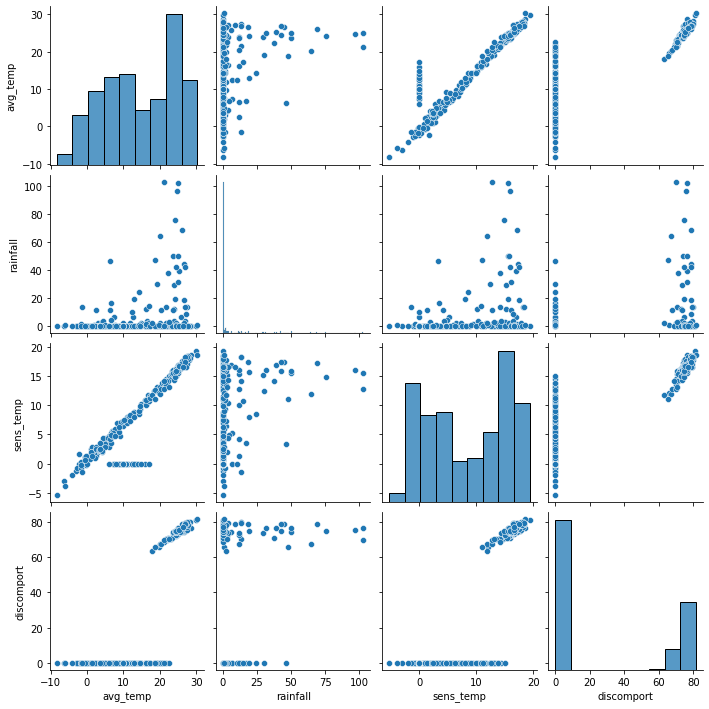

In [804]:
sns.pairplot(weather_df1[['avg_temp', 'rainfall', 'sens_temp', 'discomport']]);

In [805]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['avg_temp', 'rainfall', 'sens_temp', 'discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              144.3
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    1.18e-62
Time:                        22:52:49   Log-Likelihood:                         -2279.5
No. Observations:                 244   AIC:                                      4567.
Df Residuals:                     240   BIC:                                      4581.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_temp     347.8150     43.346      8.024      0.000     262.427     433.203
rainfall      17.4014     11.639      1.495      0.136      -5.526      40.329
sens_temp     10.0341     73.424      0.137      0.891    -134.604     154.672
discomport   -55.3814      8.777     -6.310      0.000     -72.670     -38.092
==============================================================================
Omnibus:                        5.533   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.510
Skew:                           0.368   Prob(JB):                       0.0636
Kurtosis:                       2.989   Cond. No.                         23.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

불쾌지수(discomport)의 coef가 -55.3814이다. 즉, 불쾌지수와 배달(deliv)이 음의 상관 관계를 갖는다는 뜻이다. 불쾌지수가 높을수록 배달은 떨어진다.

In [806]:
lm = sm.OLS(weather_df1['deliv'].astype(float), weather_df1[['discomport']].astype(float))
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  deliv   R-squared (uncentered):                   0.352
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              131.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):                    1.13e-24
Time:                        22:52:49   Log-Likelihood:                         -2376.1
No. Observations:                 244   AIC:                                      4754.
Df Residuals:                     243   BIC:                                      4758.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
discomport    66.1627      5.761     11.484      0.000      54.815      77.511
==============================================================================
Omnibus:                      415.053   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.051
Skew:                          -0.363   Prob(JB):                     5.99e-06
Kurtosis:                       1.644   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

하지만 배달과 불쾌지수만 따로 OLS 회귀를 하면 양의 상관관계를 보인다. 즉 실제로 양의 상관 관계를 갖지만 다중공선성으로 인해 회귀 결과가 잘못나온것으로 보인다.

# 배달 그래프

In [807]:
deliv_case

[[20200101,
  3,
  96,
  848,
  188,
  455,
  137,
  76,
  1822,
  637,
  507,
  545,
  533,
  177,
  6024],
 [20200102,
  31,
  137,
  706,
  118,
  261,
  74,
  42,
  1069,
  304,
  377,
  288,
  295,
  68,
  3770],
 [20200103,
  32,
  91,
  715,
  140,
  351,
  92,
  39,
  1496,
  380,
  465,
  303,
  403,
  115,
  4622],
 [20200104,
  13,
  100,
  888,
  206,
  439,
  130,
  57,
  1593,
  497,
  565,
  420,
  536,
  180,
  5624],
 [20200105,
  2,
  135,
  910,
  240,
  431,
  164,
  72,
  1510,
  529,
  589,
  464,
  512,
  133,
  5691],
 [20200106,
  56,
  214,
  1428,
  300,
  430,
  168,
  74,
  2136,
  556,
  836,
  468,
  792,
  198,
  7656],
 [20200107,
  25,
  114,
  795,
  140,
  338,
  63,
  52,
  1471,
  331,
  492,
  319,
  462,
  110,
  4712],
 [20200108,
  24,
  128,
  710,
  136,
  287,
  63,
  47,
  1167,
  248,
  391,
  251,
  348,
  68,
  3868],
 [20200109, 34, 96, 681, 140, 307, 75, 59, 1364, 303, 421, 262, 374, 86, 4202],
 [20200110,
  22,
  104,
  749,
  134,
  

In [808]:
deliv_df = pd.DataFrame(deliv_case)
deliv_df.columns = [
    'date', 'lunchbox','j_food','bunsik','asian','jokbal', 'c_food','steamed',
    'chicken','dissert', 'junk_food', 'pizza', 'k_food', 'sushi', 'total']

deliv_df

,date,lunchbox,j_food,bunsik,asian,jokbal,c_food,steamed,chicken,dissert,junk_food,pizza,k_food,sushi,total
0,20200101,3,96,848,188,455,137,76,1822,637,507,545,533,177,6024
1,20200102,31,137,706,118,261,74,42,1069,304,377,288,295,68,3770
2,20200103,32,91,715,140,351,92,39,1496,380,465,303,403,115,4622
3,20200104,13,100,888,206,439,130,57,1593,497,565,420,536,180,5624
4,20200105,2,135,910,240,431,164,72,1510,529,589,464,512,133,5691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,20200827,50,249,646,88,558,127,60,1440,320,622,236,465,66,4927
240,20200828,40,268,678,109,614,156,78,1851,656,746,264,566,118,6144
241,20200829,24,340,778,112,858,181,114,2193,856,812,430,692,132,7522
242,20200830,13,274,636,99,779,271,84,2175,836,831,438,654,113,7203


In [809]:
deliv_df1 = deliv_df
del deliv_df1['date']
del deliv_df1['total']

In [810]:
deliv_df

,lunchbox,j_food,bunsik,asian,jokbal,c_food,steamed,chicken,dissert,junk_food,pizza,k_food,sushi
0,3,96,848,188,455,137,76,1822,637,507,545,533,177
1,31,137,706,118,261,74,42,1069,304,377,288,295,68
2,32,91,715,140,351,92,39,1496,380,465,303,403,115
3,13,100,888,206,439,130,57,1593,497,565,420,536,180
4,2,135,910,240,431,164,72,1510,529,589,464,512,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,50,249,646,88,558,127,60,1440,320,622,236,465,66
240,40,268,678,109,614,156,78,1851,656,746,264,566,118
241,24,340,778,112,858,181,114,2193,856,812,430,692,132
242,13,274,636,99,779,271,84,2175,836,831,438,654,113


In [811]:
print(deliv_df1)

     lunchbox  j_food  bunsik  asian  jokbal  c_food  steamed  chicken  \
0           3      96     848    188     455     137       76     1822   
1          31     137     706    118     261      74       42     1069   
2          32      91     715    140     351      92       39     1496   
3          13     100     888    206     439     130       57     1593   
4           2     135     910    240     431     164       72     1510   
..        ...     ...     ...    ...     ...     ...      ...      ...   
239        50     249     646     88     558     127       60     1440   
240        40     268     678    109     614     156       78     1851   
241        24     340     778    112     858     181      114     2193   
242        13     274     636     99     779     271       84     2175   
243        46     296     593     93     444     163       52     1478   

     dissert  junk_food  pizza  k_food  sushi  
0        637        507    545     533    177  
1        304   

<AxesSubplot:>

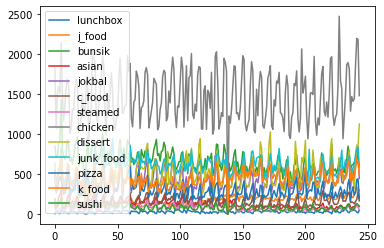

In [812]:
deliv_df1.plot.line()

In [813]:
deliv_df2 = pd.DataFrame(deliv_total)
deliv_df2

,0
0,147206
1,146212
2,153681
3,155210
4,182633
5,213694
6,218423


# 요일별 배달음식 주문 건수

<AxesSubplot:>

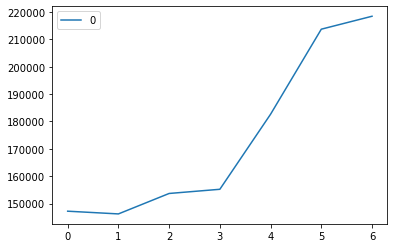

In [814]:
deliv_df2.plot.line()

데이터를 보면 화요일에 배달주문이 제일 적고 일요일에 가장 많다

<AxesSubplot:>

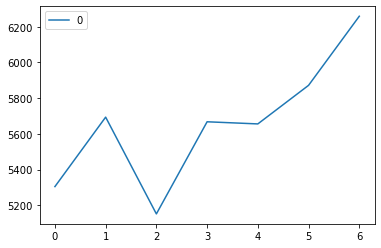

In [815]:
lunchbox_df = pd.DataFrame(lunchbox_total)
lunchbox_df.plot.line()

<AxesSubplot:>

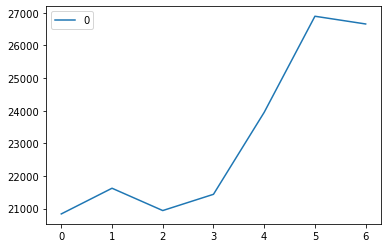

In [816]:
j_food_df = pd.DataFrame(j_food_total)
j_food_df.plot.line()

<AxesSubplot:>

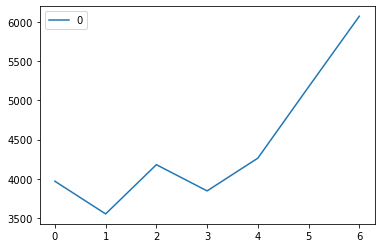

In [817]:
bunsik_df = pd.DataFrame(bunsik_total)
bunsik_df.plot.line()

<AxesSubplot:>

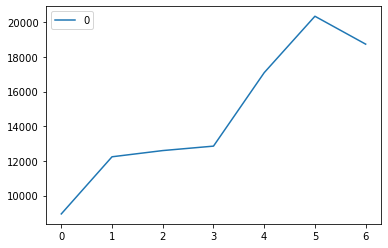

In [818]:
asian_df = pd.DataFrame(asian_total)
asian_df.plot.line()

<AxesSubplot:>

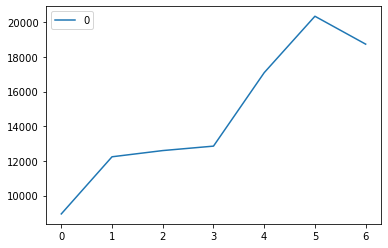

In [819]:
jokbal_df = pd.DataFrame(jokbal_total)
jokbal_df.plot.line()

<AxesSubplot:>

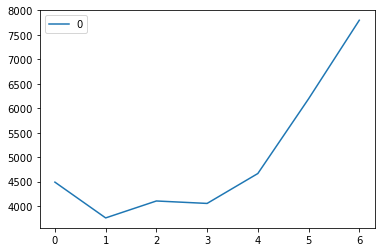

In [820]:
c_food_df = pd.DataFrame(c_food_total)
c_food_df.plot.line()

<AxesSubplot:>

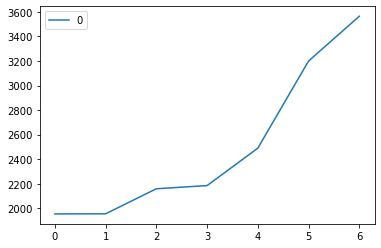

In [821]:
steamed_df = pd.DataFrame(steamed_total)
steamed_df.plot.line()

<AxesSubplot:>

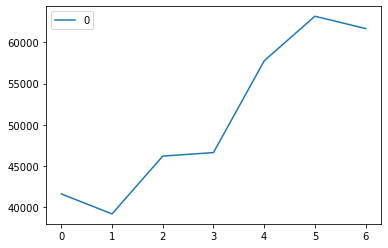

In [822]:
chicken_df = pd.DataFrame(chicken_total)
chicken_df.plot.line()

<AxesSubplot:>

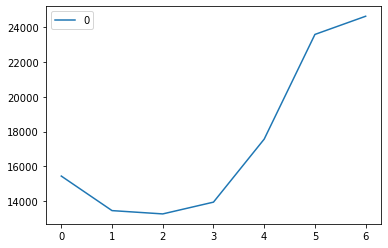

In [823]:
dissert_df = pd.DataFrame(dissert_total)
dissert_df.plot.line()

<AxesSubplot:>

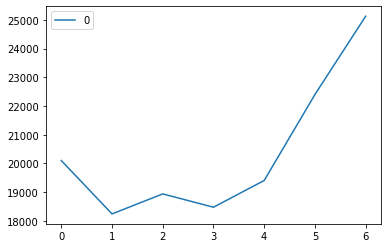

In [825]:
junk_food_df = pd.DataFrame(junk_food_total)
junk_food_df.plot.line()

<AxesSubplot:>

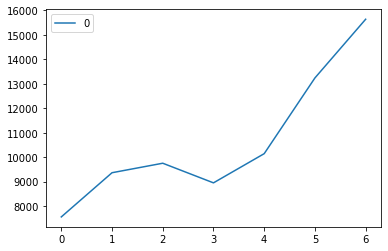

In [826]:
pizza_df = pd.DataFrame(pizza_total)
pizza_df.plot.line()

<AxesSubplot:>

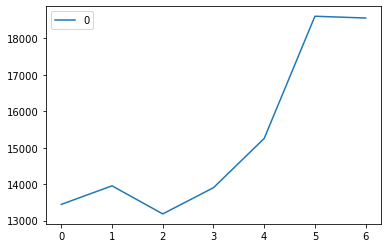

In [827]:
k_food_df = pd.DataFrame(k_food_total)
k_food_df.plot.line()

<AxesSubplot:>

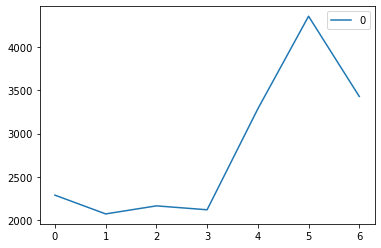

In [828]:
sushi_df = pd.DataFrame(sushi_total)
sushi_df.plot.line()

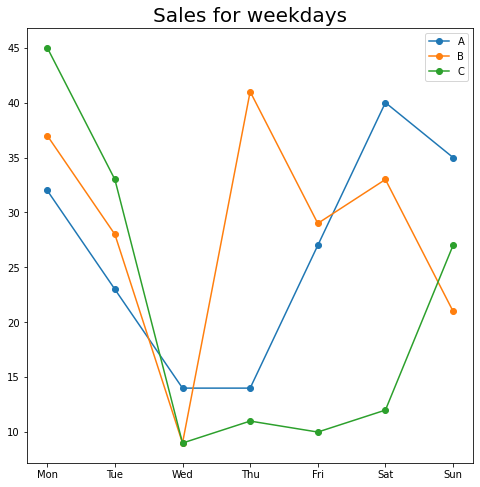

In [835]:
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['days'] = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']*3 ## 요일


a_df = df.query('corp =="A"') 
a_visits = a_df['visits']
days = a_df['days']
 
b_df = df.query('corp =="B"')
b_visits = b_df['visits']
 
c_df = df.query('corp =="C"')
c_visits = c_df['visits']
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(days,a_visits,marker='o',label='A') ## 선그래프 생성
ax.plot(days,b_visits,marker='o',label='B') 
ax.plot(days,c_visits,marker='o',label='C') 
 
ax.legend() ## 범례
 
plt.title('Sales for weekdays',fontsize=20) ## 타이틀 설정
plt.show()